### 影评文本分类

参考：https://tensorflow.google.cn/tutorials/keras/basic_text_classification

In [1]:
import tensorflow as tf
import keras

imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape,test_data.shape)
print(len(train_data[0]),len(train_data[1]))

Using TensorFlow backend.


(25000,) (25000,)
218 189


In [2]:
## 将整数转换回字词
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
# 使用 decode_review 函数显示第一条影评的文本
decode_review(train_data[0])

# 由于影评的长度必须相同，我们将使用 pad_sequences 函数将长度标准化
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
# 查看文本长度及第一条文本
len(train_data[0]), len(train_data[1])
print(train_data[0])

1646592/1641221 [==============================] - 85s 52us/step
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480  

In [3]:
## 构建模型
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [5]:
## 这是一个二元分类问题且模型会输出一个概率（应用 S 型激活函数的单个单元层），因此我们将使用 binary_crossentropy 损失函数
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
## 创建验证集(使用前10000个样本)
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [7]:
## 训练模型
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 4s 251us/step - loss: 0.6914 - acc: 0.6173 - val_loss: 0.6891 - val_acc: 0.5933
Epoch 2/40
15000/15000 [==============================] - 2s 119us/step - loss: 0.6842 - acc: 0.7250 - val_loss: 0.6792 - val_acc: 0.7525
Epoch 3/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.6689 - acc: 0.7544 - val_loss: 0.6596 - val_acc: 0.7374
Epoch 4/40
15000/15000 [==============================] - 2s 123us/step - loss: 0.6412 - acc: 0.7745 - val_loss: 0.6287 - val_acc: 0.7767
Epoch 5/40
15000/15000 [==============================] - 2s 130us/step - loss: 0.6014 - acc: 0.8005 - val_loss: 0.5880 - val_acc: 0.7921
Epoch 6/40
15000/15000 [==============================] - 2s 126us/step - loss: 0.5535 - acc: 0.8199 - val_loss: 0.5438 - val_acc: 0.8072
Epoch 7/40
15000/15000 [==============================] - 2s 112us/step - loss: 0.5024 - acc: 0.8391 - val_loss: 0.4971 - 

In [8]:
## 评估模型
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 35us/step
[0.3412599616765976, 0.869]


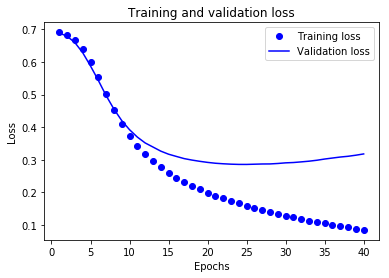

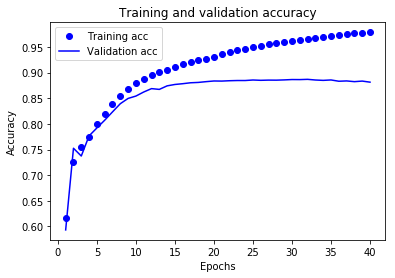

In [10]:
## 创建准确率和损失随时间变化的图
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()